In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Business Understanding

A primeira etapa da metodologia consiste em identificar as reais necessidades do projeto. 
Antes de respondermos algumas perguntas vamos entender um pouco melhor sobre a empresa em questão

<b>Wallmart</b>
<br/>
<br/>
Walmart, Inc., é uma multinacional estadunidense de lojas de departamento. 
A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões.Sendo uma das principais lojas de varejo do mundo!

### <p style="color: #2281e6"> <b>Perguntas para esclarecimento do negócio. </b></p>

<b>Qual a necessidade da empresa ? </b>
<br/>
A empresa possui uma necessidade de identificar o faturamento das lojas nos USA. São 45 lojas espalhadas pelo país.

<b>Qual o objetivo do projeto ? </b>
<br/>
Fazer um levantamento do faturamento das 45 lojas e apontar qual seria o melhor loja para expandir o tamanho.

<b>Quais as métricas de sucesso a serem alcançadas ? </b>
<br/>
Identificar a melhor loja para expandir de tamanho




## Data Understanding

A segunda etapa consiste em coletar, organizar e documentar todos os dados que se encontram disponíveis para realizar a análise exploratória. São 4 tasks principais para essa etapa do processo. Coleta inicial dos dados, descrição dos dados, exploração dos dados e qualidade dos dados

### <p style="color: #2281e6"> <b> 1° etapa - Coleta inicial dos dados</b></p>

<b>Os dados estão disponíveis ?</b>
<br/>
Sim. Temos um CSV com todas as informações necessárias para a resolução do problema


### <p style="color: #2281e6"> <b> 2° etapa - Descrição dos dados</b></p>

<b>Qual a estrutura desses dados ?</b>


<img src="explicação-dataset.png" width=70%>

In [78]:
df = pd.read_csv('Walmart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### <p style="color: #2281e6"> <b> 3° etapa - Exploração dos dados</b></p>

Entendendo melhor os dados disponíveis.

In [79]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<AxesSubplot:>

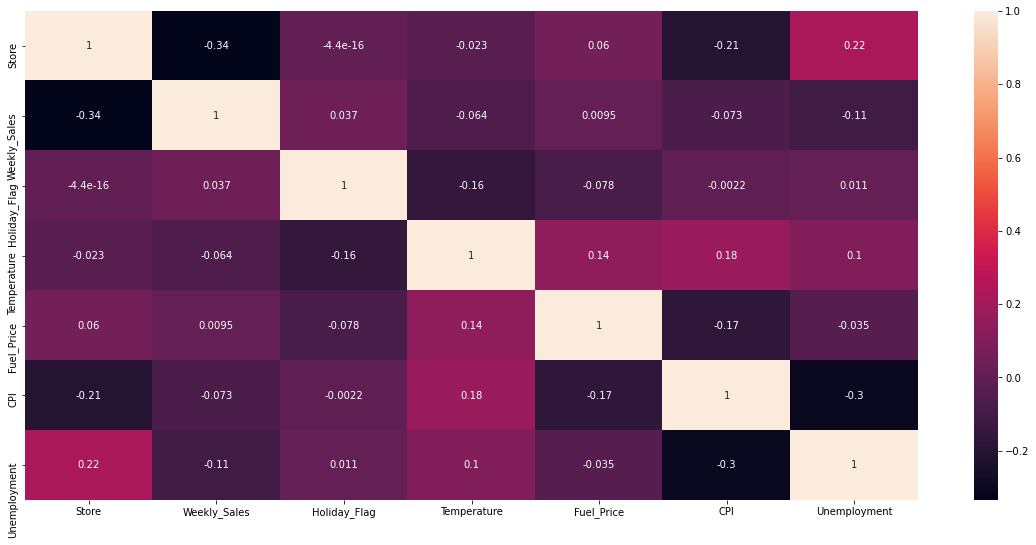

In [89]:
plt.figure(figsize = (20,9))
sns.heatmap(df.corr(),  annot=True)

In [81]:
# Verficando se a quantidade de lojas bate
df['Store'].sort_values(ascending = True).value_counts()

4     143
2     143
10    143
14    143
18    143
22    143
26    143
30    143
34    143
38    143
42    143
3     143
7     143
11    143
15    143
19    143
23    143
27    143
31    143
35    143
39    143
6     143
45    143
8     143
41    143
12    143
16    143
20    143
24    143
28    143
32    143
36    143
40    143
44    143
1     143
5     143
9     143
13    143
17    143
21    143
25    143
29    143
33    143
37    143
43    143
Name: Store, dtype: int64

In [82]:
# Verificando quantos registros existem na semana de algum feriado
df[(df['Store'] == 1) & (df['Holiday_Flag'] == 1)].count()

Store           10
Date            10
Weekly_Sales    10
Holiday_Flag    10
Temperature     10
Fuel_Price      10
CPI             10
Unemployment    10
dtype: int64

## <p style="color: #030ea8"> <b> Gerando insights </b></p>

In [186]:
new_df = df.drop(['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], axis=1)
new_df.head()

,Store,Date,Weekly_Sales
0,1,05-02-2010,1643690.90
1,1,12-02-2010,1641957.44
2,1,19-02-2010,1611968.17
3,1,26-02-2010,1409727.59
4,1,05-03-2010,1554806.68


1046964.8775617732

Verificando a soma de vendas de cada semana agrupado por loja

In [187]:

average_weekly_price = new_df.groupby(['Store', 'Date']).sum()

average_weekly_price = np.round(average_weekly_price / 1000000, 2)
pd.set_option('display.max_rows', None)
average_weekly_price

Weekly_Sales
Store Date                    
1     01-04-2011          1.50
      01-06-2012          1.62
      01-07-2011          1.49
      01-10-2010          1.45
      02-03-2012          1.69
      02-04-2010          1.59
      02-07-2010          1.49
      02-09-2011          1.55
      02-12-2011          1.58
      03-02-2012          1.64
      03-06-2011          1.64
      03-08-2012          1.63
      03-09-2010          1.54
      03-12-2010          1.55
      04-02-2011          1.61
      04-03-2011          1.64
      04-05-2012          1.68
      04-06-2010          1.62
      04-11-2011          1.70
      05-02-2010          1.64
      05-03-2010          1.55
      05-08-2011          1.62
      05-10-2012          1.67
      05-11-2010          1.55
      06-01-2012          1.55
      06-04-2012          1.90
      06-05-2011          1.63
      06-07-2012          1.77
      06-08-2010          1.61
      07-01-2011          1.44
      07-05-2010          1.60
      07-09-2012          1.66
      07-10-2011          1.63
      08-04-2011          1.61
      08-06-2012          1.70
      08-07-2011          1.53
      08-10-2010          1.51
      09-03-2012          1.68
      09-04-2010          1.55
      09-07-2010          1.55
      09-09-2011          1.54
      09-12-2011          1.80
      10-02-2012          1.80
      10-06-2011          1.59
      10-08-2012          1.59
      10-09-2010          1.51
      10-12-2010          1.68
      11-02-2011          1.65
      11-03-2011          1.55
      11-05-2012          1.61
      11-06-2010          1.54
      11-11-2011          1.59
      12-02-2010          1.64
      12-03-2010          1.44
      12-08-2011          1.53
      12-10-2012          1.57
      12-11-2010          1.49
      13-01-2012          1.46
      13-04-2012          1.62
      13-05-2011          1.60
      13-07-2012          1.53
      13-08-2010          1.51
      14-01-2011          1.39
      14-05-2010          1.49
      14-09-2012          1.52
      14-10-2011          1.49
      15-04-2011          1.56
      15-06-2012          1.63
      15-07-2011          1.46
      15-10-2010          1.46
      16-03-2012          1.68
      16-04-2010          1.47
      16-07-2010          1.45
      16-09-2011          1.51
      16-12-2011          1.88
      17-02-2012          1.82
      17-06-2011          1.53
      17-08-2012          1.60
      17-09-2010          1.43
      17-12-2010          1.89
      18-02-2011          1.69
      18-03-2011          1.58
      18-05-2012          1.60
      18-06-2010          1.50
      18-11-2011          1.54
      19-02-2010          1.61
      19-03-2010          1.47
      19-08-2011          1.53
      19-10-2012          1.51
      19-11-2010          1.48
      20-01-2012          1.39
      20-04-2012          1.52
      20-05-2011          1.43
      20-07-2012          1.50
      20-08-2010          1.51
      21-01-2011          1.33
      21-05-2010          1.40
      21-09-2012          1.51
      21-10-2011          1.50
      22-04-2011          1.56
      22-06-2012          1.53
      22-07-2011          1.40
      22-10-2010          1.35
      23-03-2012          1.51
      23-04-2010          1.39
      23-07-2010          1.39
      23-09-2011          1.38
      23-12-2011          2.27
      24-02-2012          1.54
      24-06-2011          1.44
      24-08-2012          1.49
      24-09-2010          1.35
      24-12-2010          2.39
      25-02-2011          1.46
      25-03-2011          1.54
      25-05-2012          1.56
      25-06-2010          1.42
      25-11-2011          2.03
      26-02-2010          1.41
      26-03-2010          1.40
      26-08-2011          1.46
      26-10-2012          1.49
      26-11-2010          1.96
      27-01-2012          1.32
      27-04-2012          1.47
      27-05-2011          1.47
      27-07-2012          1.44
      27-08-2010   

Verificando a soma total das vendas semanais, e agrupando por loja

In [189]:
total_sum = new_df.groupby(['Store']).sum()
total_sum = np.round(total_sum / 1000000, 2)
total_sum.sort_values(by= ['Weekly_Sales'], ascending =False).head(10)

,Weekly_Sales
Store,
20,301.40
4,299.54
14,289.00
13,286.52
2,275.38
10,271.62
27,253.86
6,223.76
1,222.40


-----------------------------------------------------------------------------------

Analisando como as vendas se comportam entre as lojas. Incluindo o valor minimo, máximo, média e mediana. 

In [191]:
sales_stores = df.groupby('Store').Weekly_Sales.agg([min, max, 'mean', 'median'])

#Modificando as unidades para milhões
sales_stores = np.round(sales_stores / 1000000, 2)
sales_stores.head()

,min,max,mean,median
Store,,,,
1,1.32,2.39,1.56,1.53
2,1.65,3.44,1.93,1.88
3,0.34,0.61,0.40,0.40
4,1.76,3.68,2.09,2.07
5,0.26,0.51,0.32,0.31


### <p style="color: #2281e6"> <b> 4° etapa - Qualidade dos dados</b></p>

In [84]:
#Verificando se possui valores nulos
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [85]:
#Verificando valores estatistico para tentar encontrar algum valor discrepante
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Data Preparation

Nesta etapa, devemos tratar os dados para nos certificarmos que as informações estão de acordo com o esperado. Consistência de erros e ausência de valores deverão ser resolvidos <br/>
Aqui existem 4 etapas de preparação: Seleção dos dados, Limpeza dos dados, Construção de dados e Integrando dados.

### <p style="color: #2281e6"> <b> 1° etapa - Seleção dos dados</b></p>

Foi definido que para chegar ao nosso objeto, as colunas "Temperature" e "CPI" não seriam necessárias, então foram removidas do dataset

In [86]:
clean_df = df.drop(columns=['Temperature', 'CPI'])
clean_df

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,Unemployment
0,1,05-02-2010,1643690.90,0,2.572,8.106
1,1,12-02-2010,1641957.44,1,2.548,8.106
2,1,19-02-2010,1611968.17,0,2.514,8.106
3,1,26-02-2010,1409727.59,0,2.561,8.106
4,1,05-03-2010,1554806.68,0,2.625,8.106
...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,3.997,8.684
6431,45,05-10-2012,733455.07,0,3.985,8.667
6432,45,12-10-2012,734464.36,0,4.000,8.667
6433,45,19-10-2012,718125.53,0,3.969,8.667


### <p style="color: #2281e6"> <b> 2° etapa - Limpeza dos dados</b></p>

Nossos dados estão de uma maneira geral, com coerência. Não possuem valores nulos, e nem dados inconsistentes

### <p style="color: #2281e6"> <b> 3° etapa - Construção de dados</b></p>

### <p style="color: #2281e6"> <b> 4° etapa - Integrando dados</b></p>

Não haverá integração de dados

In [87]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
